In [1]:
import DataLoading
from torch.utils.data import DataLoader,TensorDataset
import torch
import pandas as pd
import NN_classes
import NN_evaluation
import training_methods
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import the original data for plotting
sc = "sc01"
period = "2030"
folder = "../Data/3-bus_DC_fy/"
all_executions = DataLoading.list_executions(folder=folder,per = period,sc=sc)
len(all_executions)
executions = all_executions[0:40]
te_s = 0.3
val_s = 0.3
outp = "SystemCosts"
hyperloop_name = "test_loss_rand_hours__3-bus_DC_0.3_v0.3_PF_0_20"

In [3]:
#Analyze the loss results
df_losses = pd.read_csv(f"Loss_results_csv/{hyperloop_name}.csv",index_col = 0)
df_losses.columns

Index(['Model_type', 'Dor', 'Relu_out', 'Batch_size', 'Lr', 'Epochs',
       'Min_val', 'Nb_hours_used', 'Tr_l', 'Te_l', 'V_l', 'Tr_l_mse',
       'Te_l_mse', 'V_l_mse', 'Tr_l_mae', 'Te_l_mae', 'Te_l_mae_man',
       'V_l_mae', 'fy_l', 'fy_l_mse', 'fy_l_mae', 'fy_l_mae_man', 'Train_time',
       'Eval_time', 'alpha', 'beta', 'MAE', 'Test size', 'Val size'],
      dtype='object')

In [4]:
df_losses.sort_values(by="fy_l")

,Model_type,Dor,Relu_out,Batch_size,Lr,Epochs,Min_val,Nb_hours_used,Tr_l,Te_l,...,fy_l_mse,fy_l_mae,fy_l_mae_man,Train_time,Eval_time,alpha,beta,MAE,Test size,Val size
129,"(1, 1)",0,False,64,0.000625,256,all_epochs,900,1.742958e-07,1.815618e-07,...,1.605835e-07,0.000301,0.000301,57.559381,0.004854,0,1,False,0.3,0.3
128,"(1, 1)",0,False,64,0.000625,256,min_val,900,1.132137e-07,1.310182e-07,...,1.806802e-07,0.000308,0.000308,57.559381,0.005954,0,1,False,0.3,0.3
228,"(1, 1)",0,False,64,0.002500,64,min_val,1700,3.462968e-07,3.444426e-07,...,3.422129e-07,0.000401,0.000401,26.882159,0.007324,0,1,False,0.3,0.3
229,"(1, 1)",0,False,64,0.002500,64,all_epochs,1700,3.462968e-07,3.444426e-07,...,3.422129e-07,0.000401,0.000401,26.882159,0.005377,0,1,False,0.3,0.3
184,"(1, 1)",0,False,64,0.002500,128,min_val,1300,3.917298e-07,4.379190e-07,...,5.372276e-07,0.000523,0.000523,41.489101,0.006108,0,1,False,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,"(1, 1)",0,False,64,0.000625,64,all_epochs,10,2.907210e-01,3.004870e-01,...,1.069172e-01,0.316728,0.316728,0.309478,0.002621,0,1,True,0.3,0.3
270,"(1, 1)",0,False,64,0.000625,128,min_val,10,4.328408e-01,4.316654e-01,...,1.890908e-01,0.434776,0.434776,0.584892,0.002108,0,1,True,0.3,0.3
271,"(1, 1)",0,False,64,0.000625,128,all_epochs,10,4.328408e-01,4.316654e-01,...,1.890908e-01,0.434776,0.434776,0.584892,0.002602,0,1,True,0.3,0.3
315,"(1, 1)",0,False,64,0.000625,64,all_epochs,20,4.961494e-01,4.964275e-01,...,2.467181e-01,0.496513,0.496513,0.448886,0.002686,0,1,True,0.3,0.3


<Axes: xlabel='Nb_hours_used', ylabel='fy_l_mse'>

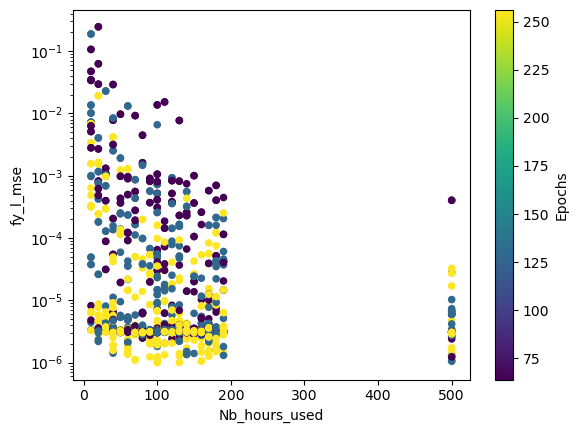

In [24]:
df_losses[df_losses.Nb_hours_used <=500].plot.scatter(x="Nb_hours_used",y="fy_l_mse",c = "Epochs",colormap = "viridis",logy = True)

<Axes: xlabel='Te_l', ylabel='fy_l'>

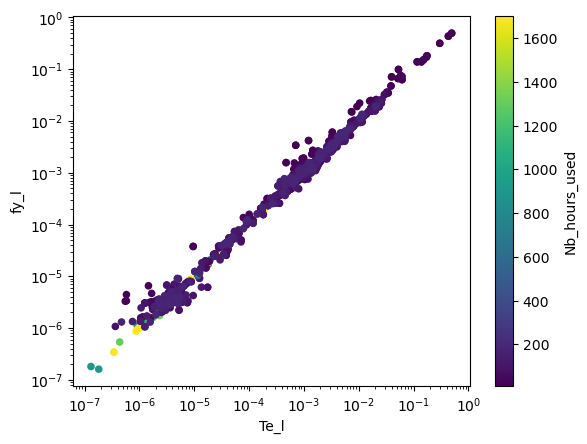

In [6]:
df_losses.plot.scatter(x="Te_l",y="fy_l",c = "Nb_hours_used",colormap = "viridis",logy=True,logx=True)

In [29]:
d_ft_in["train"]

tensor([[0.4263, 0.4646, 0.4432,  ..., 0.0000, 0.0000, 0.0000],
        [0.4831, 0.7107, 0.6672,  ..., 0.0000, 0.0000, 0.0000],
        [0.4096, 0.6074, 0.4360,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.6672, 0.6935, 0.4946,  ..., 1.0000, 1.0000, 0.0000],
        [0.5640, 0.5578, 0.5033,  ..., 1.0000, 1.0000, 0.0000],
        [0.4464, 0.5331, 0.4310,  ..., 1.0000, 1.0000, 0.0000]],
       dtype=torch.float64)

In [7]:
dfs_in, dfs_out, dfs_inter = DataLoading.load_data_ext_out(folder, all_executions, period, sc, ["PowerFlow"])
dfs_inter_j = DataLoading.join_frames_inter_layer(dfs_inter,all_executions)
dfs_inter_j = DataLoading.trim_columns_to_common(dfs_inter_j)
# Convert to pytorch tensors
ts_in, ts_out, ts_inter = DataLoading.split_tr_val_te_ext_out(dfs_in, dfs_out, dfs_inter_j, all_executions, te_s, val_s)
d_ft_in, d_ft_out, d_ft_inter,maxs = DataLoading.concat_and_normalize_ext_out(ts_in, ts_out, ts_inter, all_executions)

input_size = dfs_in["Network_Existing_Generation_Full"].shape[1]
inter_size = dfs_inter_j["Network_Existing_Generation_Full"].shape[1]

#Extract fy sets
t_in_fy, t_out_fy, t_inter_fy, maxs = DataLoading.concat_all_exec_fy(dfs_in, dfs_out, dfs_inter_j,all_executions)

input_f_sc01_Network_Existing_Generation_Full_2030.csv
14
input_f_sc01_Network_Full_Generation_Full_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_2_cac1_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_2_cac2_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_2_cac3_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_3_cac1_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_3_cac2_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_1_Node_3_cac3_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_2_Node_3_cac1_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_2_Node_3_cac2_2030.csv
14
input_f_sc01_PINT_Network_Line_In_Node_2_Node_3_cac3_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_Node_2_cac1_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_Node_2_cac2_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_Node_2_cac3_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_Node_3_cac1_2030.csv
14
input_f_sc01_TOOT_Network_Line_In_Node_1_No

In [8]:
df_losses = pd.read_csv(f"Loss_results_csv/{hyperloop_name}.csv",index_col=0)

f = df_losses.Nb_hours_used >=1

loss_to_sort = "fy_l_mse"

In [12]:
row

,Model_type,Dor,Relu_out,Batch_size,Lr,Epochs,Min_val,Nb_hours_used,Tr_l,Te_l,...,fy_l_mse,fy_l_mae,fy_l_mae_man,Train_time,Eval_time,alpha,beta,MAE,Test size,Val size
214,"(0, 0)",0,False,64,0.0025,256,min_val,1700,0.000198,0.000189,...,9.522166e-08,0.000192,0.000192,89.615459,0.00438,0,1,True,0.3,0.3


[3]
3
1
OE_1700hours_(0, 0)h_256e_0.0025lr_0dor_Falsero_64bs_0ill_TrueMAE min_val
trained_models/test_loss_rand_hours__3-bus_DC_0.3_v0.3_PF_0_20/min_val/model_OE_1700hours_(0, 0)h_256e_0.0025lr_0dor_Falsero_64bs_0ill_TrueMAE.pth


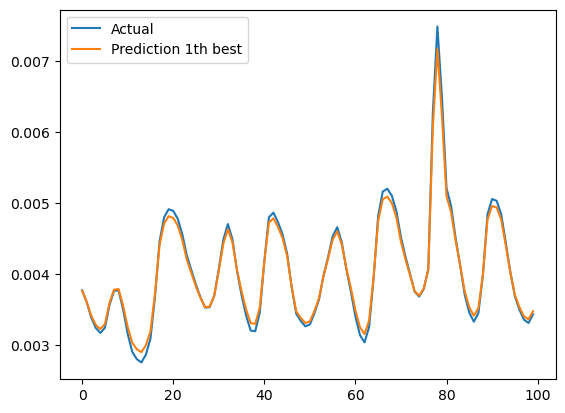

In [11]:
#Visualisation of multiple models in input order
ex = all_executions[0]


#ex_in = torch.nan_to_num(ts_in[data_part][ex]/maxs["in"])
ex_in = torch.nan_to_num(dfs_in[ex].to_numpy()/maxs["in"])
ex_out = dfs_out[ex].sum(axis=1).to_numpy()


s = 24*10
e=s+100
plt.plot(ex_out[s:e],label = "Actual")

for xth_best in [1]: 
    row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
    m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=False)
    prediction = m(ex_in.float())[0].detach().numpy()
    plt.plot(prediction[s:e],label = f"Prediction {xth_best}th best")
plt.legend()

Network_Existing_Generation_Full
[3]
3
1
OE_1700hours_(0, 0)h_256e_0.0025lr_0dor_Falsero_64bs_0ill_TrueMAE min_val
trained_models/test_loss_rand_hours__3-bus_DC_0.3_v0.3_PF_0_20/min_val/model_OE_1700hours_(0, 0)h_256e_0.0025lr_0dor_Falsero_64bs_0ill_TrueMAE.pth
Network_Full_Generation_Full
[3]
3
1
OE_1700hours_(0, 0)h_256e_0.0025lr_0dor_Falsero_64bs_0ill_TrueMAE min_val
trained_models/test_loss_rand_hours__3-bus_DC_0.3_v0.3_PF_0_20/min_val/model_OE_1700hours_(0, 0)h_256e_0.0025lr_0dor_Falsero_64bs_0ill_TrueMAE.pth


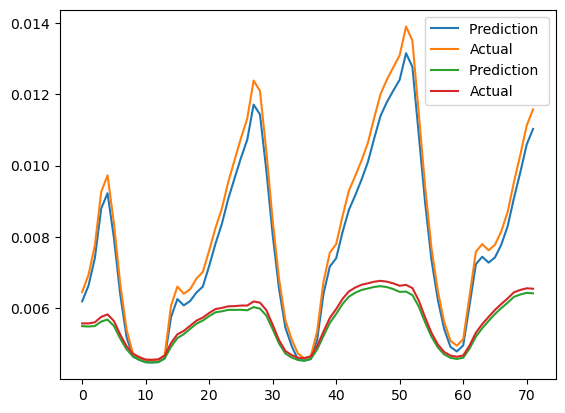

In [13]:
#Visualisation of multiple executions in input order


s = 4600
e=s+72


for ex_i in [0,1]:
    ex = all_executions[ex_i]
    print(ex)
    row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
    m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=False)
    ex_in = torch.nan_to_num(dfs_in[ex].to_numpy()/maxs["in"])
    ex_out = dfs_out[ex].sum(axis=1).to_numpy()
    prediction = m(ex_in.float())[0].detach().numpy()
    plt.plot(prediction[s:e],label = f"Prediction ")
    plt.plot(ex_out[s:e],label = f"Actual")

plt.legend()

Text(0.5, 1.0, 'Derived line benefits')

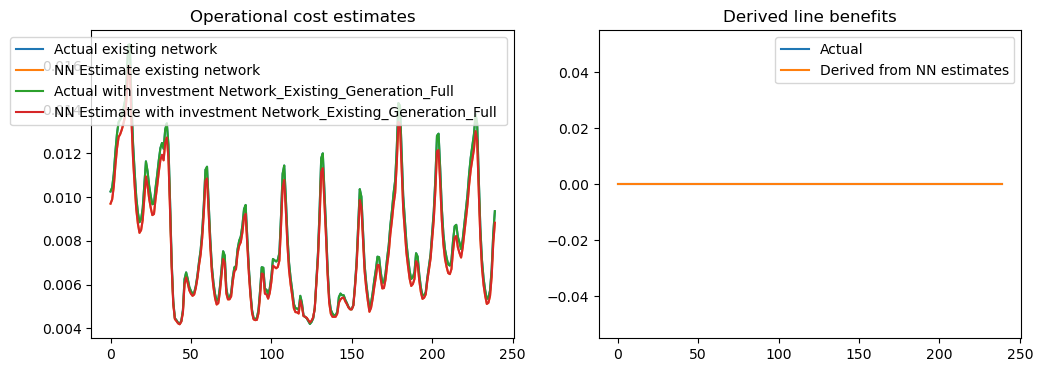

In [21]:
#Visualisation of multiple executions in input order
# f = df_losses.alpha ==0.0
# loss_to_sort = "Te_l_mae"
# xth_best = 1
# row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
# m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=False)

#ex_in = torch.nan_to_num(ts_in[data_part][ex]/maxs["in"])

l_idx = 0
ex = all_executions[l_idx]
negf = all_executions[0]


ex_in_e = torch.nan_to_num(dfs_in[ex].to_numpy()/maxs["in"])
ex_in_negf = torch.nan_to_num(dfs_in[negf].to_numpy()/maxs["in"])

prediction_e = m(ex_in_e.float())[0].detach().numpy()
prediction_negf = m(ex_in_negf.float())[0].detach().numpy()

actual_e = NN_evaluation.get_actual_from_dfs_out(ex,dfs_out)
actual_negf = NN_evaluation.get_actual_from_dfs_out(negf,dfs_out)

lb_est = prediction_negf- prediction_e
lb_actual = NN_evaluation.calculate_lb_from_dfs_out(dfs_out,ex)



#s= random.randint(0,len(actual_e))
s=5000
e = s+24*10

fig, axs = plt.subplots(1,2,figsize = (12,4))

axs[0].plot(actual_negf[s:e],label = "Actual existing network")
axs[0].plot(prediction_e[s:e],label = "NN Estimate existing network")
axs[0].plot(actual_e[s:e],label = f"Actual with investment {ex}")
axs[0].plot(prediction_negf[s:e],label = f"NN Estimate with investment {ex} ")

axs[0].legend()
axs[0].set_title("Operational cost estimates")


axs[1].plot(lb_actual[s:e],label = "Actual")
axs[1].plot(lb_est[s:e],label = "Derived from NN estimates")

axs[1].legend()
axs[1].set_title(f"Derived line benefits")

#axs[2].hist(lb_actual/actual_negf,bins= 100)


In [22]:
#Check loss calculation 
f = df_losses.Nb_hours_used >= 1
loss_to_sort = "fy_l_mse"
xth_best = 1
row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=False)
prediction = m(t_in_fy.float())

[3]
3
1
OE_1700hours_(0, 0)h_256e_0.0025lr_0dor_Falsero_64bs_0ill_TrueMAE min_val
trained_models/test_loss_rand_hours__3-bus_DC_0.3_v0.3_PF_0_20/min_val/model_OE_1700hours_(0, 0)h_256e_0.0025lr_0dor_Falsero_64bs_0ill_TrueMAE.pth


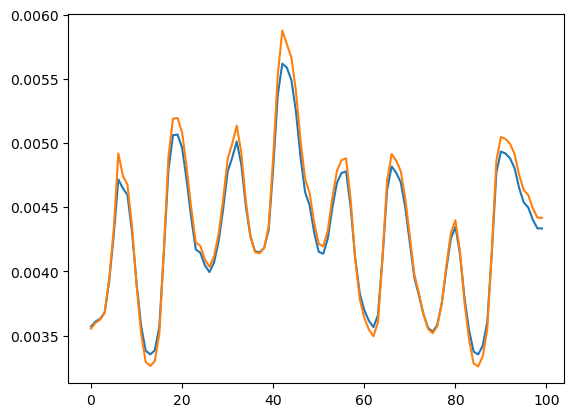

In [16]:
s = 0
e = 100
plt.plot(prediction[0].squeeze()[s:e].detach())
plt.plot(t_out_fy[s:e],label = f"Actual")

In [17]:
#Calculate loss manually 
manual_diff = prediction[0].detach().numpy().transpose() - t_out_fy.numpy()
np.mean(np.abs(manual_diff)),np.mean(np.square(manual_diff))

(0.00019180810341501973, 9.522163302032957e-08)

In [18]:
row.fy_l_mae.item(),row.fy_l_mse.item()

(0.0001918081855507, 9.522165835796063e-08)